In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset (replace 'storm_data.csv' with your actual file)
df = pd.read_csv('storm_data.csv')

# Handle missing values (if any)
df.fillna(df.mean(), inplace=True)




In [2]:
# Drop unnecessary columns (if any) and define features and target
X = df.drop(columns=['surge '])  # Features (exclude the target 'surge')
y = df['surge ']  # Target variable (storm surge)

# Export preprocessed data to CSV
df.to_csv('preprocessed_storm_data.csv', index=False)



In [3]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Linear Regression MSE: 0.06095772579677275
Linear Regression R2: 0.48208110672385196


D:\python\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


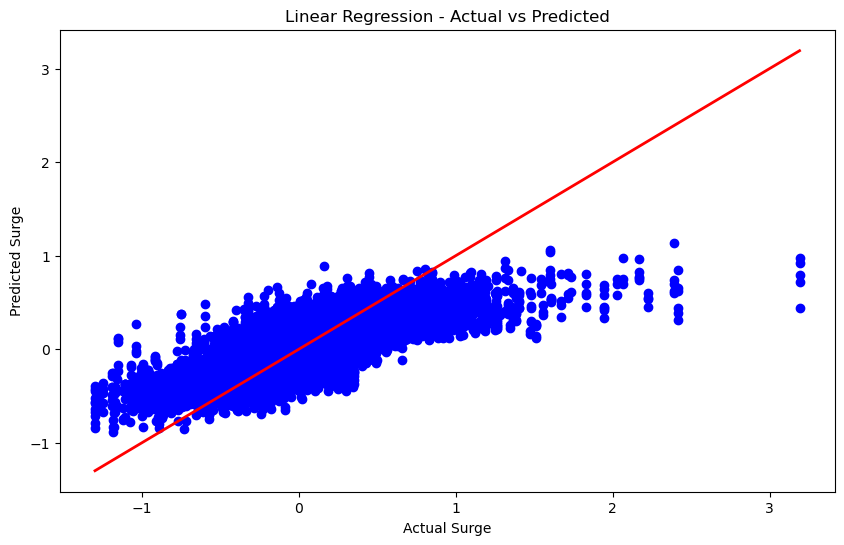

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# a) Load Linear Regression model and fit the training data
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# b) Predict the testing data
y_pred_lr = lr_model.predict(X_test)

# Evaluate Linear Regression model
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)
print(f"Linear Regression MSE: {lr_mse}")
print(f"Linear Regression R2: {lr_r2}")

# c) Predict for new data (example with first row of X_test)
new_prediction_lr = lr_model.predict([X_test.iloc[0]])

# d) Plot multiple linear regression model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual Surge')
plt.ylabel('Predicted Surge')
plt.title('Linear Regression - Actual vs Predicted')
plt.show()


Bayesian Ridge MSE: 0.06095791867637479
Bayesian Ridge R²: 0.48207946794896794
Bayesian Ridge Prediction for new data: [8.42141016]


D:\python\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but BayesianRidge was fitted with feature names
  warnings.warn(


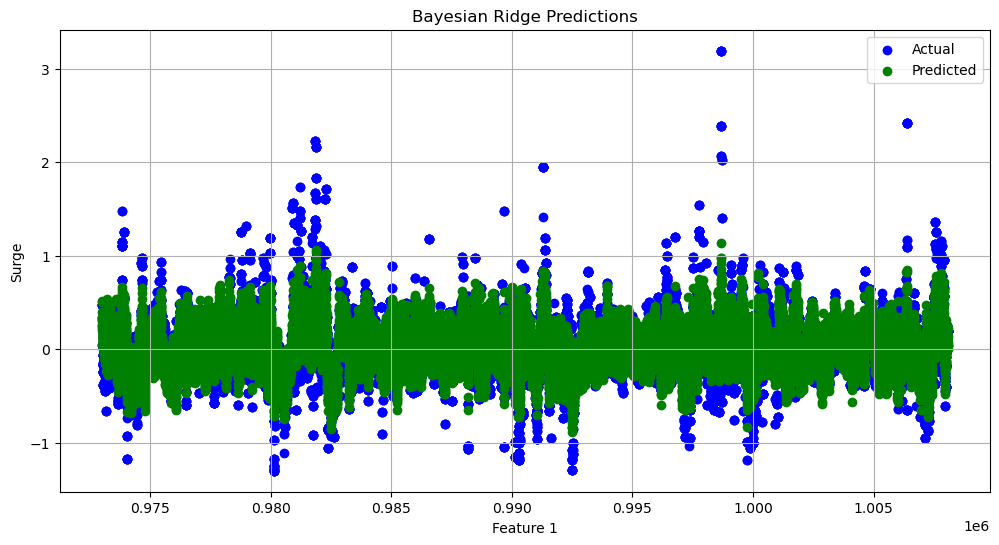

In [5]:
import numpy as np
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming X_train and X_test have been correctly defined before
# Fit the Bayesian Ridge model
nb_model = BayesianRidge()
nb_model.fit(X_train, y_train)

# Predict the testing data
y_pred_nb = nb_model.predict(X_test)

# Evaluate the model
mse_nb = mean_squared_error(y_test, y_pred_nb)
r2_nb = r2_score(y_test, y_pred_nb)

print(f"Bayesian Ridge MSE: {mse_nb}")
print(f"Bayesian Ridge R²: {r2_nb}")

# Ensure new_data has the same number of features as X_train
# Example of new_data with 5 features, adjust according to your features
new_data = np.array([[0.5, 1.2, 0.7, 2.1, 0.3]])  # Replace with actual new data features

# Predict for new data
y_new_pred_nb = nb_model.predict(new_data)
print(f"Bayesian Ridge Prediction for new data: {y_new_pred_nb}")

# Plotting
plt.figure(figsize=(12, 6))
plt.scatter(X_test.iloc[:, 0], y_test, color='blue', label='Actual')
plt.scatter(X_test.iloc[:, 0], y_pred_nb, color='green', label='Predicted')
plt.title('Bayesian Ridge Predictions')
plt.xlabel('Feature 1')  # Replace with your feature name
plt.ylabel('Surge')
plt.legend()
plt.grid(True)
plt.show()


Random Forest MSE: 0.01478385897847249
Random Forest R2: 0.8743909852213272


D:\python\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


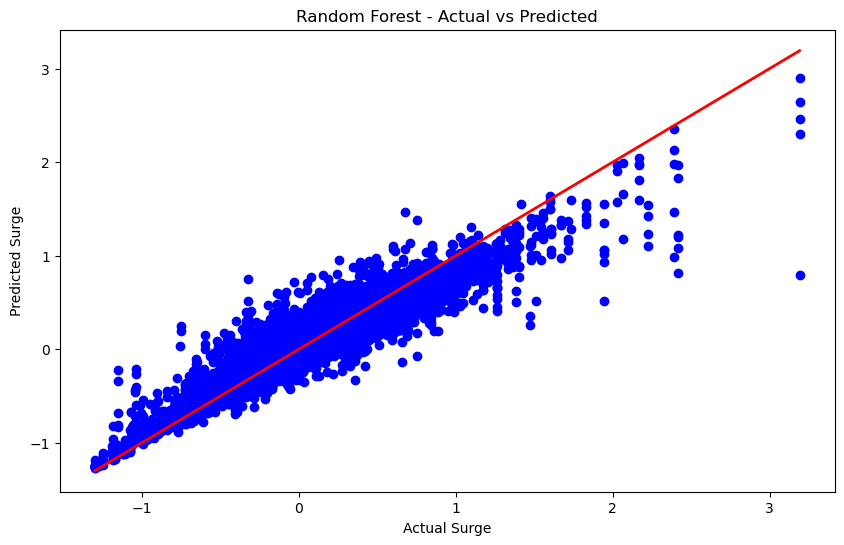

In [6]:
from sklearn.ensemble import RandomForestRegressor

# a) Load the Random Forest model and fit the training data
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# b) Predict the testing data
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest model
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)
print(f"Random Forest MSE: {rf_mse}")
print(f"Random Forest R2: {rf_r2}")

# c) Predict for new data (example with first row of X_test)
new_prediction_rf = rf_model.predict([X_test.iloc[0]])

# d) Plot the Random Forest model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual Surge')
plt.ylabel('Predicted Surge')
plt.title('Random Forest - Actual vs Predicted')
plt.show()


In [ ]:
from sklearn.svm import SVR

# a) Loading the model and fitting it with training data
svm_model = SVR(kernel='linear')  # Linear kernel
svm_model.fit(X_train, y_train)

# b) Predict the testing data
y_pred_svm = svm_model.predict(X_test)

# Evaluate
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

print(f"SVM MSE: {mse_svm}")
print(f"SVM R²: {r2_svm}")

# c) Predict for new data (example new data)
new_data = np.array([[0.5, 1.2, 0.7]])  # Replace with actual new data features
y_new_pred_svm = svm_model.predict(new_data)
print(f"SVM Prediction for new data: {y_new_pred_svm}")

# d) Plot model
plt.figure(figsize=(12, 6))
plt.scatter(X_test.iloc[:, 0], y_test, color='blue', label='Actual')
plt.scatter(X_test.iloc[:, 0], y_pred_svm, color='orange', label='Predicted')
plt.title('SVM Predictions')
plt.xlabel('Feature 1')  # Replace with your feature name
plt.ylabel('Surge')
plt.legend()
plt.grid(True)
plt.show()


Random Forest MSE: 0.01478385897847249
Random Forest R²: 0.8743909852213272
Prediction for new data: [-0.4996967]


D:\python\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


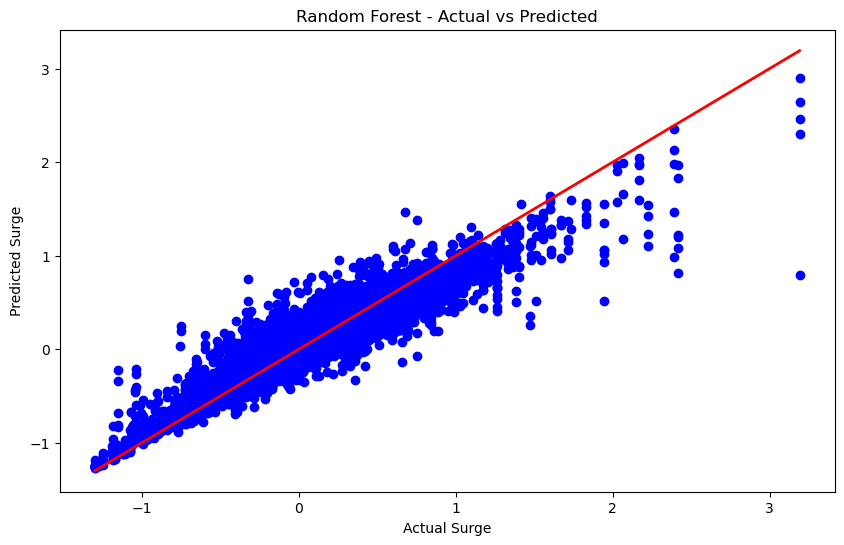

In [7]:
import pickle
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# a) Load the Random Forest model and fit the training data
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Save the model to a file using pickle
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

# Load the model from the file
with open('random_forest_model.pkl', 'rb') as file:
    loaded_rf_model = pickle.load(file)

# b) Predict the testing data using the loaded model
y_pred_rf = loaded_rf_model.predict(X_test)

# Evaluate Random Forest model
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)
print(f"Random Forest MSE: {rf_mse}")
print(f"Random Forest R²: {rf_r2}")

# c) Predict for new data (example with first row of X_test)
new_prediction_rf = loaded_rf_model.predict([X_test.iloc[0]])
print(f"Prediction for new data: {new_prediction_rf}")

# d) Plot the Random Forest model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual Surge')
plt.ylabel('Predicted Surge')
plt.title('Random Forest - Actual vs Predicted')
plt.show()
